In [13]:
import os
os.chdir("../")
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import time
from numpy.linalg import eigvals, norm
import pickle

from graph_utils import *

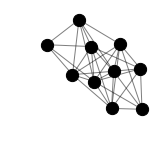

In [14]:
G = nx.gnp_random_graph(10,0.75)
p = draw_graph(G,fig_size=2)

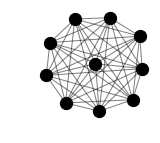

In [15]:
K = nx.complete_graph(len(G))
p=draw_graph(K,fig_size=2)

In [16]:
BK = nx.incidence_matrix(K, oriented=True).todense()
BK.shape

(10, 45)

In [17]:
np.kron(BK,np.eye(2)).shape

(20, 90)

In [18]:
np.eye(1)

array([[1.]])

(0, 5)

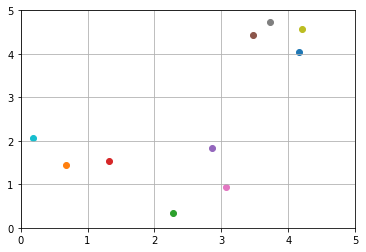

In [19]:
x_max = y_max = 5
positions = np.zeros((len(G)*2))
velocities = np.zeros((len(G)*2))
i=0
while(i<len(G)*2):
    positions[i],positions[i+1] = y_max*np.random.rand(2)
    i= i+2
    
i=0
while(i<len(G)*2):
    velocities[i],velocities[i+1] = 5*np.random.rand(2)
    i= i+2
    
i=0
while i < len(G)*2:
    plt.scatter(positions[i],positions[i+1])
    i = i+2
plt.grid()
plt.xlim(0,x_max)
plt.ylim(0,y_max)

In [20]:
positions = positions.reshape(1,20)
velocities = velocities.reshape(1,20)
positions.shape

(1, 20)

In [21]:
def S_graph_pos(positions,R=3):
    S = nx.Graph()
    if (positions.shape[1] != 2): 
        size = (int(positions.shape[1]/2),2)
    else:
        size = positions.shape
    for i,r1 in enumerate(positions.reshape(size)):
        for j,r2 in enumerate(positions.reshape(size)):
            if (sum(r1 == r2) < 2 and norm(r1-r2)<R):
                S.add_edge(i,j)
            else:
                S.add_node(i)
    return S

In [22]:
def S_graph_rel(re,n,R=3):
    S = nx.Graph()
    size = (int(re.shape[1]/2),2)
    for i in range(0,n):
        S.add_node(i)
    j=-1
    for i, x in enumerate(re.reshape(size)):
        if (i % 9 == 0):
            j=j+1
        if (norm(x)<R):
            print(j)
            S.add_edge(j,i%9)
            
    return S

In [23]:
R.reshape((45,2))

NameError: name 'R' is not defined

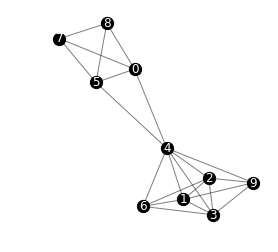

In [24]:
S = S_graph_pos(positions,3)
            
p=draw_graph(S,fig_size=4, labels=True)

In [25]:
re = np.dot(positions,np.kron(BK,np.eye(2)))

0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4


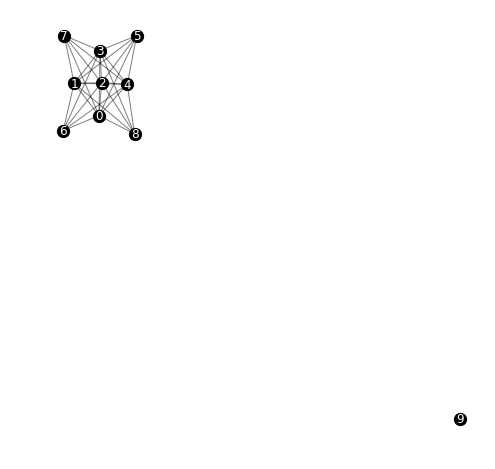

10

In [26]:
p=re.reshape((45,2))
s = S_graph_rel(re,10,100)
q = draw_graph(s,labels=True)
len(s)

In [27]:
p

matrix([[-3.47111831, -2.60360334],
        [-1.87813992, -3.70231219],
        [-2.83777961, -2.49797339],
        [-1.28710245, -2.20140509],
        [-0.6875546 ,  0.40307778],
        [-1.08372954, -3.09688758],
        [-0.4334901 ,  0.69594953],
        [ 0.05742372,  0.54311136],
        [-3.97248077, -1.96540021],
        [ 1.5929784 , -1.09870885],
        [ 0.63333871,  0.10562994],
        [ 2.18401586,  0.40219825],
        [ 2.78356371,  3.00668112],
        [ 2.38738878, -0.49328424],
        [ 3.03762822,  3.29955287],
        [ 3.52854204,  3.14671469],
        [-0.50136246,  0.63820312],
        [-0.95963969,  1.2043388 ],
        [ 0.59103747,  1.5009071 ],
        [ 1.19058532,  4.10538997],
        [ 0.79441038,  0.60542461],
        [ 1.44464982,  4.39826172],
        [ 1.93556364,  4.24542354],
        [-2.09434085,  1.73691197],
        [ 1.55067716,  0.2965683 ],
        [ 2.15022501,  2.90105117],
        [ 1.75405007, -0.59891418],
        [ 2.40428951,  3.193

In [28]:
norm(p[9])

1.9351334079544962

In [29]:
np.array([0.010596,1.9689])-np.array([])

ValueError: operands could not be broadcast together with shapes (2,) (0,) 

In [30]:
def stack(v):
    if v.shape != (len(v),2):
        print("Wrong shape need (any,2)")
        return -1
    ret = np.zeros(2*len(v))
    j=0
    for i in range(0,len(v)):
        ret[j] = v[i,0]
        ret[j+1] = v[i,1]
        j = j+2
    return ret

def unstack(v):
    ret = np.zeros((int((len(v)/2)),2))
    i=0
    j=0
    while i < len(v):
        ret[j,0] = v[i]
        ret[j,1] = v[i+1]
        i = i+2
        j = j+1
    return ret

def v_dot(v, r, v_graph, s_graph, R):
    def grad_V(r1,r2,R=3):
        r = norm(r1-r2)
        if (r < 0 ):
            return float('inf')
        if(r<R):
            return (r1-r2)*(-2**R**2)/(r**4)
        else:
            return (r1-r2)/(r*R)
    #v = v.reshape((len(v_graph),2))
    v_dot = np.zeros((len(v_graph),2))
    dv = 0
    for i in range(0,len(v_graph)):
        for j in nx.neighbors(v_graph,i):
            if (j != i):
                dv = dv + (v[i]-v[j])
        dV = 0
        for k in range(0,len(v_graph)):
            for l in nx.neighbors(s_graph,k):
                if (l != k):
                    dV = dV + grad_V(r[k],r[l],R=R)
        v_dot[i] = v_dot[i] - dv - dV
    return v_dot
    #return v_dot.reshape((1,2*len(v)))

def r_dot(v):
    return v

def V(r1,r2, R=3):
    r = norm(r1-r2)
    if (r < 0):
        return float('inf')
    if(r < R):
        return (R**2)/(r**2)
    else:
        return r/R

def grad_V(r1,r2,R=3):
    r = norm(r1-r2)
    if (r < 0 ):
        return float('inf')
    if(r<R):
        return (r1-r2)*(-2**R**2)/(r**4)
    else:
        return (r1-r2)/(r*R)

In [31]:
positions

array([[4.15253191, 4.03921305, 0.6814136 , 1.43560971, 2.274392  ,
        0.33690086, 1.31475231, 1.54123966, 2.86542946, 1.83780796,
        3.46497731, 4.44229083, 3.06880238, 0.94232547, 3.71904182,
        4.73516258, 4.20995563, 4.5823244 , 0.18005114, 2.07381283]])

In [141]:
G = nx.watts_strogatz_graph(10,3,0.2)

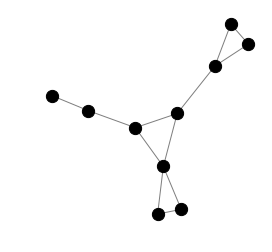

In [142]:
x_max = y_max = 5
positions = np.zeros((len(G)*2))
velocities = np.zeros((len(G)*2))
i=0
while(i<len(G)*2):
    positions[i],positions[i+1] = y_max*np.random.rand(2)
    i= i+2
    
i=0
while(i<len(G)*2):
    velocities[i],velocities[i+1] = 8*np.random.rand(2)
    if (np.random.rand(1)<0.5):
        velocities[i] = -1*velocities[i]
    if(np.random.rand(1)<0.5):
        velocities[i+1] = -1*velocities[i+1]
    i= i+2
    
d = 2
S = S_graph_pos(positions.reshape((10,2)),d)

G = nx.gnp_random_graph(10,0.75)

T = 10
dt=0.01
t=0

v_graph = G
s_graph = S
r = positions.reshape((10,2))
v = velocities.reshape((10,2))

p = draw_graph(S,fig_size=4)

In [143]:
v

array([[ 4.9227123 , -1.40982891],
       [ 5.57486142, -0.07930815],
       [-1.19491148,  2.67119762],
       [ 2.30576401,  6.0358411 ],
       [ 5.14995075,  1.08944639],
       [-3.50139454, -6.02277654],
       [ 1.20592213,  7.87853407],
       [-4.55164519, -2.49031679],
       [-3.38901564,  4.00651861],
       [-0.9228836 , -5.13236254]])

In [144]:
R = list()
V = list()
SG = list()
VG = v_graph

while t < T:
    u = v
    v = v + dt*v_dot(v,r,v_graph, s_graph, R=d)
    r = r+dt*r_dot(u)
    s_graph = S_graph_pos(r, R=d)
    R.append(r)
    V.append(v)
    SG.append(s_graph)
    t = t+dt

In [145]:
V[0].shape

(10, 2)

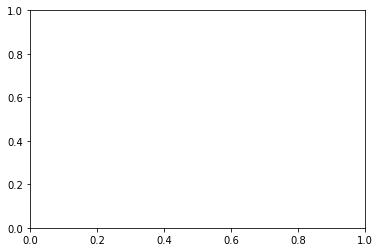

In [146]:
for i in range(0,100):
    f = update_frame(V,R,SG,VG,i)
    f.savefig('sim_pic/'+str(i)+'.png')
    plt.cla()

In [132]:
def update_frame(V,R,SG,VG,i):
    fig = plt.figure(1)
    norms = np.zeros(V[i].shape[0])
    unit = np.zeros(V[i].shape)
    for j in range(0,V[i].shape[0]):
        norms[j] = norm(V[i][j])
        unit[j] = V[i][j]/norms[j]
    rel = np.zeros(V[i].shape)
    for j in range(0,V[i].shape[0]):
        rel[j] = unit[j]*(norm(V[i][j])/max(norms))

    for j in range(0,10):
        plt.arrow(R[i][j,0],R[i][j,1],rel[j,0],rel[j,1],
                  width=.1,
                  edgecolor='green',
                  facecolor='green')


    nx.draw_networkx(SG[i], pos=R[i], edge_color='black', width=2.5, node_size=25, with_labels=False)
    nx.draw_networkx(VG, pos=R[i], edge_color='blue', width=0.5, node_size=25, with_labels=False)


    plt.xlim(plt.xlim()[0]-np.abs(unit[0,0]),plt.xlim()[1]+np.abs(unit[0,0]))
    plt.ylim(plt.ylim()[0]-np.abs(unit[0,1]), plt.ylim()[1]+np.abs(unit[0,1]))
    
    speed = np.zeros(V[i].shape[0])
    for j in range(0,V[i].shape[0]):
        speed[j] = norm(V[i][j])
    
    plt.title("Mean speed: {0} u/s \n Simulation Time {1} s".format(np.round(np.mean(speed),2), i*dt))

    return fig

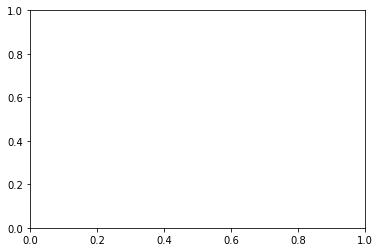

In [42]:
imageio.mimwrite

AttributeError: 'function' object has no attribute 'help'

In [140]:
import imageio
import os
ids = list()
for i in range(0,100):
    ids.append('sim_pic/'+str(i)+'.png')

images = []
for i in ids:
    images.append(imageio.imread(i))
imageio.mimsave('../Data/movie.gif', images, 'GIF', duration=0.05)

In [161]:
import matplotlib.animation as animation

fig = plt.figure()

ims = []
for i in range(0,100):
    if (i % 10 == 0):
        unit = np.zeros(V[i].shape)
        for j in range(0,len(V[i])):
            unit[j] = V[i][j]/norm(V[i][j])

        for j in range(0,10):
            plt.arrow(R[i][j,0],R[i][j,1],unit[j,0],unit[j,1],
                      width=.1,
                      edgecolor='green',
                      facecolor='green')


        nx.draw_networkx(SG[i], pos=R[i], edge_color='r', width=5)
        nx.draw_networkx(VG, pos=R[i], edge_color='black', width=2.5)


        plt.xlim(plt.xlim()[0]-unit[0,0],plt.xlim()[1]+unit[0,0])
        plt.ylim(plt.ylim()[0]-unit[0,1], plt.ylim()[1]+unit[0,1])

        fig.canvas.draw()
        X = np.array(fig.canvas.renderer._renderer)
        im = plt.imshow(X)
        ims.append([im])
        plt.cla()


ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)


from matplotlib.animation import FFMpegWriter
writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save("movie.mp4", writer=writer)

<Figure size 432x288 with 0 Axes>

In [76]:
image.reshape((width,height,3))

TypeError: 'numpy.float64' object cannot be interpreted as an integer

IndexError: index 10 is out of bounds for axis 0 with size 10

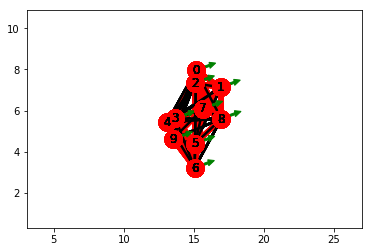

In [176]:
unit = np.zeros(v.shape)
for i in range(0,len(v)):
    unit[i] = v[i]/norm(v[i])


for i in range(0,10):
    plt.arrow(r[i,0],r[i,1],unit[i,0],unit[i,1],
              width=.1,
              edgecolor='green',
              facecolor='green')
    

    nx.draw_networkx(s_graph, pos=r, edge_color='r', width=5)
    nx.draw_networkx(v_graph, pos=r, edge_color='black', width=2.5)

    plt.xlim(plt.xlim()[0]-unit[0,0],plt.xlim()[1]+unit[0,0])
    plt.ylim(plt.ylim()[0]-unit[0,1], plt.ylim()[1]+unit[0,1])

In [773]:
r+unit

array([[11.6178834 , 16.82326793],
       [ 8.21081087, 20.97450117],
       [11.03134134, 18.07299392],
       [10.47557443, 19.50011206],
       [ 8.07940133, 17.86088501],
       [ 8.469207  , 18.87242446],
       [ 8.97656978, 16.57675374],
       [11.61233867, 19.19752416],
       [ 8.61166422, 16.53934395],
       [ 7.35830903, 20.54549009]])

In [735]:
positions.reshape(10,2)

array([[4.1713068 , 0.91813427],
       [0.97396728, 4.85186166],
       [3.72728247, 1.90933124],
       [3.15961453, 3.42721454],
       [0.76077245, 1.77322941],
       [1.18878545, 2.57583381],
       [1.4727141 , 0.64003011],
       [4.44526626, 3.06014689],
       [1.25423651, 0.49133175],
       [0.0385735 , 4.4077663 ]])

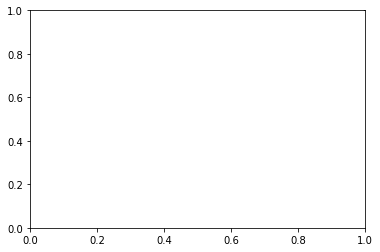

In [802]:
plt.arrow(1,1,2,2, width=.15,edgecolor=None, facecolor='black')

In [276]:
velocities

array([[0.9959915 , 0.78822563, 1.15127203, 1.12897428, 1.27558316,
        0.24665442, 0.86674908, 1.57417972, 0.54896427, 0.12964408,
        0.82305116, 1.42658465, 1.16794972, 1.51903638, 0.66539465,
        0.42100074, 1.40954961, 0.6916389 , 0.25997836, 1.17899304]])

In [277]:
unstack(v)

0


IndexError: index 0 is out of bounds for axis 0 with size 0

In [282]:
v

array([[0.9959915 , 0.78822563, 1.15127203, 1.12897428, 1.27558316,
        0.24665442, 0.86674908, 1.57417972, 0.54896427, 0.12964408,
        0.82305116, 1.42658465, 1.16794972, 1.51903638, 0.66539465,
        0.42100074, 1.40954961, 0.6916389 , 0.25997836, 1.17899304]])

In [295]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

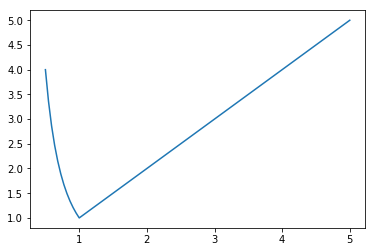

In [331]:
x = np.linspace(0.5,5,100)
y = np.zeros(len(x))
for i in range(0,len(x)):
    y[i] = V(x[i],0)
plt.plot(x,y)

In [326]:
norm(1-0)

1.0

In [838]:
unit[2], unit[1]

(array([0.41307351, 0.91069769]), array([0.41307351, 0.91069769]))

In [843]:
ref = np.angle(complex(unit[1,0],unit[1,1]))
f = True
tol=1e-6
for i in range(0,len(unit)):
    if (np.abs(ref - np.angle(complex(unit[i,0],unit[i,1])))>tol):
        f = False
print(f)
    

True


In [1]:
def velocity_angle_agreement(v,tol=1e-6):
    unit = np.zeros(v.shape)
    for i in range(0,len(v)):
        unit[i] = v[i]/norm(v[i])
    ref = np.angle(complex(unit[1,0],unit[1,1]))
    for i in range(0,len(unit)):
        if (np.abs(ref - np.angle(complex(unit[i,0],unit[i,1])))>tol):
            return False
    return True

In [1]:
import os
os.chdir("../")
from Flocking_2D import *

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import time
from numpy.linalg import eigvals, norm
import pickle

from graph_utils import *

def v_dot(v, r, v_graph, s_graph,R, *args):
    def grad_V(r1,r2,R=3):
        r = norm(r1-r2)
        if (r < 0 ):
            return float('inf')
        if(r<R):
            return (r1-r2)*(-2**R**2)/(r**4)
        else:
            return (r1-r2)/(r*R)
    #v = v.reshape((len(v_graph),2))
    v_dot = np.zeros((len(v_graph),2))
    dv = 0
    for i in range(0,len(v_graph)):
        for j in nx.neighbors(v_graph,i):
            if (j != i):
                dv = dv + (v[i]-v[j])
        dV = 0
        for k in range(0,len(v_graph)):
            for l in nx.neighbors(s_graph,k):
                if (l != k):
                    dV = dV + grad_V(r[k],r[l],R)
        v_dot[i] = v_dot[i] - dv - dV
    return v_dot
    #return v_dot.reshape((1,2*len(v)))

def r_dot(v, *args):
    return v

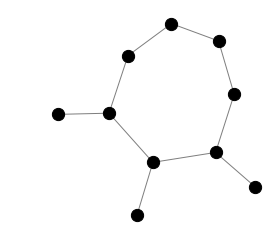

In [2]:
G = nx.watts_strogatz_graph(10,3,0.5)
p = draw_graph(G,fig_size=4)

In [3]:
FS = Flock_Simulation(G,r_dot,v_dot)

Argument Error: position_dynamics_args must be np.ndarray type
Argument Error: velocity_dynamics_args must be np.ndarray type


In [4]:
FS.v

array([[-5.93962261,  1.32798765],
       [-5.08131723, -3.06776348],
       [ 0.64943452,  1.97902236],
       [ 7.34062094,  4.38670941],
       [-0.66806364,  5.02679919],
       [-6.88174941,  3.62657942],
       [-6.86642404, -0.52975128],
       [-7.30114023, -0.43347695],
       [-3.98250998, -5.40607443],
       [ 5.54648718, -7.20520489]])

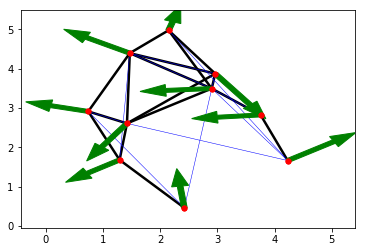

In [5]:
FS.plot()

In [6]:
FS.r

array([[0.74555083, 2.91352184],
       [1.29303202, 1.68023577],
       [2.14833429, 4.97755442],
       [4.22900624, 1.66365042],
       [2.42373861, 0.46010514],
       [1.47109758, 4.39581232],
       [3.7553712 , 2.82417946],
       [2.90196995, 3.49570452],
       [1.42216376, 2.60906794],
       [2.96309329, 3.87486304]])

In [7]:
FS.run_sim()

3.738119125366211


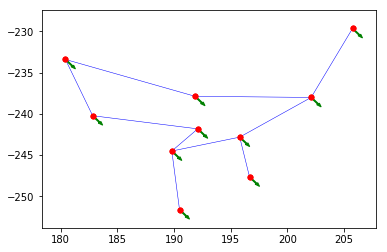

In [8]:
FS.plot()

In [9]:
r = np.zeros((5,2))
for i in range(0,5):
    r[i] = 5*np.random.rand(2)

In [10]:
r

array([[1.77816332, 2.52887365],
       [3.78330912, 2.66989089],
       [2.02796301, 0.44861403],
       [3.09643337, 2.23638297],
       [3.1714566 , 0.67898493]])

In [16]:
5*np.random.randn(2)

array([ 4.6266365 , -1.11736781])